In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import cv2
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras import layers
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [2]:
def load_images_from_directory(image_directory, image_size, num):
    images = []
    labels = []

    for label, class_folder in enumerate(os.listdir(image_directory)):
        class_path = os.path.join(image_directory, class_folder)
        for image_name in os.listdir(class_path):
            image_path = os.path.join(class_path, image_name)
            image = cv2.imread(image_path)
            resized_image = cv2.resize(image, image_size)
            images.append(resized_image)
            labels.append(label)

    images = np.array(images) / num  # Normalize pixel values
    labels = np.array(labels)

    return images, labels

In [3]:
train_directory = "/Users/krupamayghosal/Downloads/charts/train_val"
val_directory = "/Users/krupamayghosal/Downloads/charts/test"
image_size=(256,256)

In [4]:
X_train, y_train = load_images_from_directory(train_directory, image_size, 255)
X_val, y_val = load_images_from_directory(val_directory, image_size, 255)

In [5]:
X_train.shape

(1000, 256, 256, 3)

# 2 Layer CNN

In [6]:
### Code for 2 layer CNN model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
num_classes = 5
batch_size = 10
epochs = 10
model = Sequential([
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(256, 256,3))
])
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (180, 180, 32)))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(num_classes, activation = "softmax"))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 128, 128, 32)      0         
                                                                 
 flatten (Flatten)           (None, 524288)            0         
                                                                 
 dense (Dense)               (None, 5)                 2621445   
                                                        

In [8]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [9]:
hist = model.fit(X_train, y_train,batch_size=batch_size,epochs=epochs,validation_data=(X_val, y_val))
print("The model has successfully trained")

Epoch 1/10


C:\Users\lenovo\anaconda3\lib\site-packages\keras\backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


100/100 [==============================] - 60s 590ms/step - loss: 1.4682 - accuracy: 0.4100 - val_loss: 1.1510 - val_accuracy: 0.7800
Epoch 2/10
100/100 [==============================] - 54s 541ms/step - loss: 0.8609 - accuracy: 0.7910 - val_loss: 0.5846 - val_accuracy: 0.8600
Epoch 3/10
100/100 [==============================] - 52s 518ms/step - loss: 0.4934 - accuracy: 0.8110 - val_loss: 0.4308 - val_accuracy: 0.7800
Epoch 4/10
100/100 [==============================] - 48s 481ms/step - loss: 0.3772 - accuracy: 0.8400 - val_loss: 0.3507 - val_accuracy: 0.7400
Epoch 5/10
100/100 [==============================] - 53s 534ms/step - loss: 0.3346 - accuracy: 0.8720 - val_loss: 0.3120 - val_accuracy: 0.8600
Epoch 6/10
100/100 [==============================] - 53s 532ms/step - loss: 0.3067 - accuracy: 0.8660 - val_loss: 0.2961 - val_accuracy: 0.8600
Epoch 7/10
100/100 [==============================] - 45s 447ms/step - loss: 0.2870 - accuracy: 0.8950 - val_loss: 0.2900 - val_accuracy: 0.8

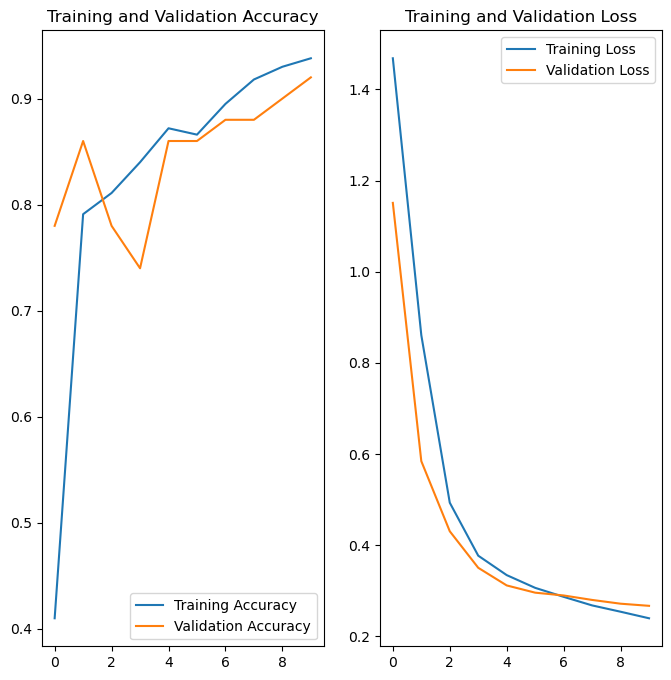

In [10]:
# Plotting accuracy and loss distribution along Epochs
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']

loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Observation: 2 layer CNN (1 conv layer and one Maxpool layer) is performing with high accuracy (92% validation accuracy).

# AlexNet CNN

In [11]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(256,256,3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')
])

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 62, 62, 96)        34944     
                                                                 
 batch_normalization (BatchN  (None, 62, 62, 96)       384       
 ormalization)                                                   
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 96)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 30, 30, 256)       614656    
                                                                 
 batch_normalization_1 (Batc  (None, 30, 30, 256)      1024      
 hNormalization)                                                 
                                                      

In [12]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [13]:
hist1 = model.fit(X_train, y_train,batch_size=batch_size,epochs=epochs,validation_data=(X_val, y_val))
print("The model has successfully trained")

Epoch 1/10
100/100 [==============================] - 163s 2s/step - loss: 21.3907 - accuracy: 0.7230 - val_loss: 351.1607 - val_accuracy: 0.0200
Epoch 2/10
100/100 [==============================] - 160s 2s/step - loss: 13.4232 - accuracy: 0.8920 - val_loss: 715.8569 - val_accuracy: 0.2400
Epoch 3/10
100/100 [==============================] - 165s 2s/step - loss: 24.6872 - accuracy: 0.8750 - val_loss: 1630.3265 - val_accuracy: 0.2400
Epoch 4/10
100/100 [==============================] - 157s 2s/step - loss: 8.3635 - accuracy: 0.9250 - val_loss: 1450.4871 - val_accuracy: 0.2600
Epoch 5/10
100/100 [==============================] - 157s 2s/step - loss: 12.6450 - accuracy: 0.9160 - val_loss: 207.6346 - val_accuracy: 0.6000
Epoch 6/10
100/100 [==============================] - 162s 2s/step - loss: 8.0401 - accuracy: 0.9520 - val_loss: 125.2091 - val_accuracy: 0.7200
Epoch 7/10
100/100 [==============================] - 157s 2s/step - loss: 2.8664 - accuracy: 0.9640 - val_loss: 583.8044 - 

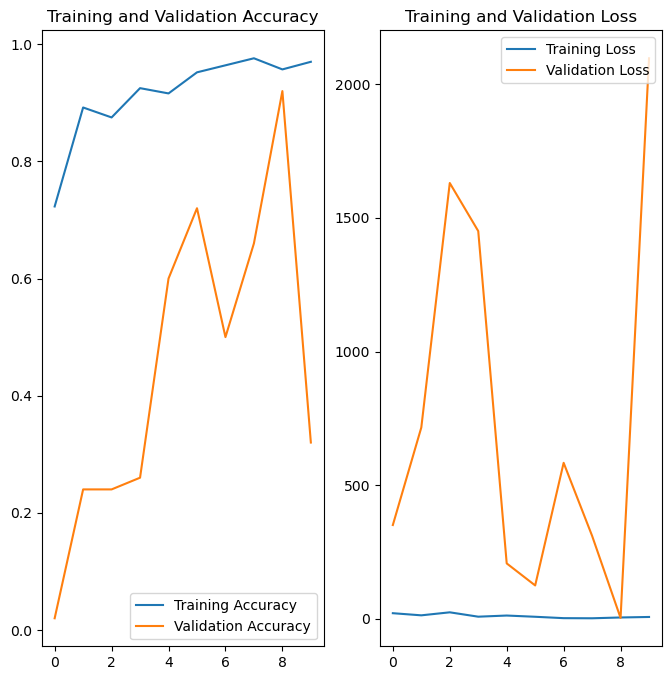

In [14]:
acc = hist1.history['accuracy']
val_acc = hist1.history['val_accuracy']

loss = hist1.history['loss']
val_loss = hist1.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

This is an example of overfitting, where 2 layer simple CNN with 2.6 Billion parameters has outperformed the complex AlexNet model with 5.8 Billion parameters.
The validation accuracy of 32% of AlexNet justifies the above statement.